# 파일 kaggle에서 다운로드해서 압축풀기

In [2]:
!pip install kaggle

In [3]:
mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:43<00:00, 25.2MB/s]
100% 2.29G/2.29G [01:43<00:00, 23.9MB/s]


In [6]:
! unzip -qq 'chest-xray-pneumonia.zip'

# 데이터셋 로드하기

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터셋 경로 : 엑스레이 파일
dtset_directory = '/content/chest_xray/'

# 클래스 이름 및 데이터 로딩
class_names = ['NORMAL','PNEUMONIA']
train_image_data = []
train_labels = []

for class_name in class_names:
  class_folder = os.path.join(dtset_directory, 'train', class_name)
  for image_name in os.listdir(class_folder):
    image_path = os.path.join(class_folder, image_name)
    image = cv2.imread(image_path)  # RGB 읽기
    image = cv2.resize(image, (64, 64))  # 이미지 크기 조정
    train_image_data.append(image)
    train_labels.append(class_names.index(class_name))



In [8]:
    # 데이터를 NumPy 배열로 변환 및 레이블 One-Hot 인코딩
image_data = np.array(train_image_data)
train_labels = np.array(train_labels)

In [9]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [10]:
print(train_labels)

[0 0 0 ... 1 1 1]


# 모델 구성,학습하기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

num_classes = 2                        # len(train_dataset.class_indices)
num_detectors = 32
width, height = 64, 64                 #  np.array(img).shape[1], np.array(img).shape[0]

model = Sequential()

model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=2*num_detectors, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=2*num_detectors, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
   # ... 코드입력

model.add(Flatten())

model.add(Dense(2*2*num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2*num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
image_data.shape

(5216, 64, 64, 3)

In [13]:
train_labels.shape

(5216,)

In [14]:
model.compile(optimizer='adam',
               loss = 'binary_crossentropy',
               metrics=['accuracy'])

In [15]:
epochs = 10
history = model.fit(image_data, train_labels, epochs=epochs)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8745 - loss: 0.3238
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9724 - loss: 0.0981
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9644 - loss: 0.1130
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9745 - loss: 0.0727
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9799 - loss: 0.0538
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9797 - loss: 0.0575
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9815 - loss: 0.0472
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9835 - loss: 0.0395
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9815 - loss: 0.0484
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9843 - loss: 0.0419


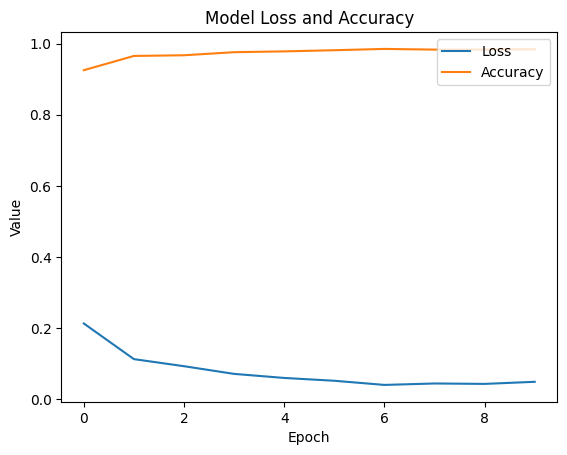

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.title('Model Loss and Accuracy')
plt.show()

# 모델 평가하기

In [17]:
# 데이터셋 경로 : 엑스레이 파일
dtset_directory = '/content/chest_xray/'

# 클래스 이름 및 데이터 로딩
class_names = ['NORMAL','PNEUMONIA']
test_image_data = []
test_labels = []

for class_name in class_names:
  class_folder = os.path.join(dtset_directory, 'test', class_name)
  for image_name in os.listdir(class_folder):
    image_path = os.path.join(class_folder, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))  # 이미지 크기 조정
    test_image_data.append(image)
    test_labels.append(class_names.index(class_name))

In [18]:
test_data = np.array(train_image_data)
test_labels = np.array(train_labels)

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


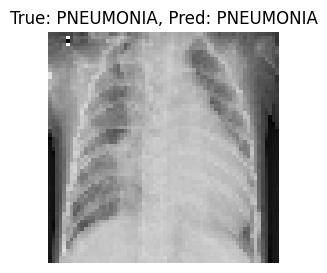

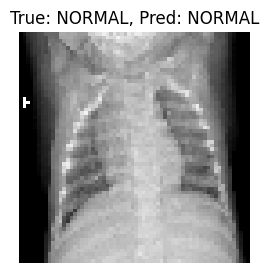

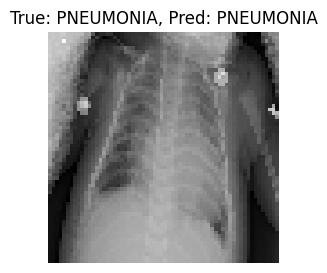

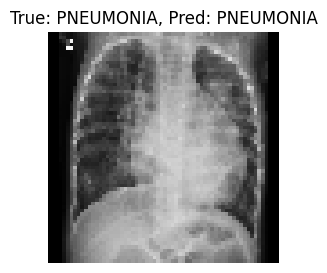

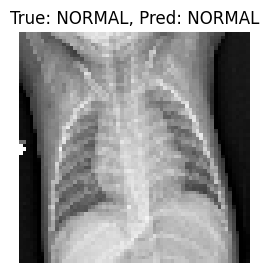

In [19]:
# 테스트 데이터 예측 및 시각화
preds = model.predict(test_data)
preds_classes = (preds > 0.5).astype("int32").squeeze()  # 임계값 0.5 이상이면 1로 변환
y_test_classes = test_labels  # 테스트 라벨이 0과 1로 구성된 경우 그대로 사용

# 시각화할 이미지 개수
num_images = 5
samples_to_display = np.random.choice(test_data.shape[0], num_images, replace=False)

# 테스트 데이터 중 일부 이미지 시각화
for i, idx in enumerate(samples_to_display):
    img = test_data[idx]  # 이미지 데이터 (64, 64, 3) 형식
    true_label = y_test_classes[idx]
    pred_label = preds_classes[idx]
    plt.figure(figsize=(5, 3))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR에서 RGB로 변환하여 표시
    plt.title(f"True: {class_names[true_label]}, Pred: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()

In [23]:
accuracy = np.mean(preds_classes == y_test_classes)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.91%


# 모델 저장 및 로드

In [20]:
from keras.models import save_model
from keras.models import load_model
import tensorflow as tf

# 모델 전체를 'model.h5' 파일로 저장
save_model(model, 'chest_xray_model.h5')

# 모델의 구조를 JSON 문자열로 반환-모델을 구성하는 각 레이어의 구성과 설정이 포함
with open('trained_model.json', 'w') as trained_model_json:
    trained_model_json.write(model.to_json())

# 모델 구조 로드하기
with open('trained_model.json', 'r') as trained_model_json:
    trained_model_json = trained_model_json.read()

# 모델 가중치 저장하기
save_model(model, '/content/chest_xray.hdf5')

# Load the trained model & weights
model = tf.keras.models.model_from_json(trained_model_json)
model.load_weights('/content/chest_xray.hdf5')